<a href="https://colab.research.google.com/github/julioclsar/Machine_Learning_Detec-o_Cancer_de_Mama/blob/main/Modelo_Detec%C3%A7%C3%A3o_de_C%C3%A2ncer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning e Data Science com Python (Persistência)

# Importação das bibliotecas básicas

In [ ]:
!pip -q install plotly --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 71.9 MB/s eta 0:00:00


In [ ]:
!pip -q install yellowbrick --upgrade

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Breast Cancer

## Exploração dos dados

In [ ]:
breast_cancer = pd.read_csv('/content/breast_cancer.csv') # recurrence (target)

In [ ]:
breast_cancer

,recurrence,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events recurrence-events,20-29 30-39 40-49 50-59 60-69 70-79,ge40 lt40 premeno,0-4 5-9 10-14 15-19 20-24 25-29 30-34 35-39 40...,0-2 3-5 6-8 9-11 12-14 15-17,no yes,1 2 3,left right,central left_low left_up right_low right_up,no yes
1,class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
3,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
4,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
...,...,...,...,...,...,...,...,...,...,...
283,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
284,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
285,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
286,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
# Remove unnecessary metadata rows (0 and 1) to clean the dataset
breast_cancer = breast_cancer.iloc[2:].reset_index(drop=True)
breast_cancer

,recurrence,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
# Guardando o data frame original
breast_cancer_original = breast_cancer.copy()
breast_cancer_original

,recurrence,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
breast_cancer.head(10)

,recurrence,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no


In [ ]:
breast_cancer.tail()

,recurrence,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no
285,recurrence-events,50-59,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
breast_cancer.describe()

,recurrence,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,286,286,286,286,285,278,286,286,285,286
unique,2,6,3,11,6,2,3,2,5,2
top,no-recurrence-events,50-59,premeno,30-34,0-2,no,2,left,left_low,no
freq,201,96,150,60,213,222,130,152,110,218


## Visualização dos dados

In [ ]:
np.unique(breast_cancer['recurrence'], return_counts=True)

(array(['no-recurrence-events', 'recurrence-events'], dtype=object),
 array([201,  85]))

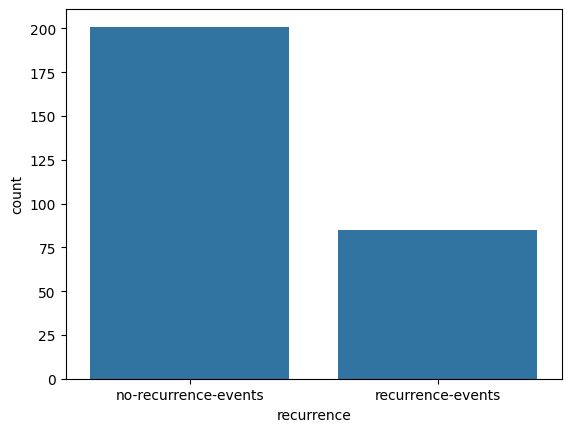

In [ ]:
sns.countplot(x = breast_cancer['recurrence']);

<Figure size 800x500 with 0 Axes>

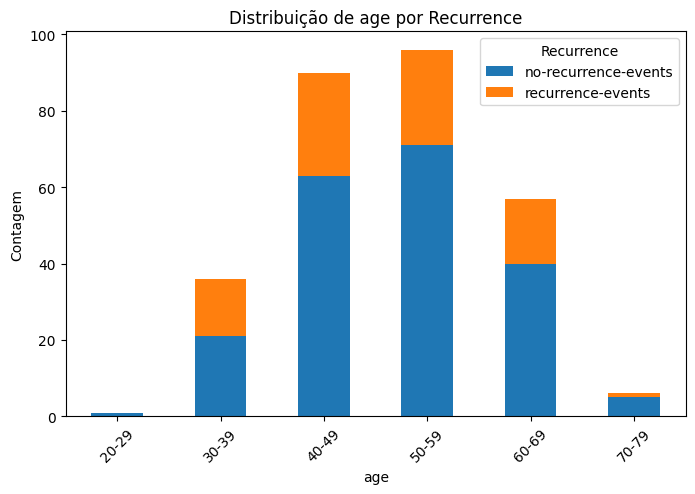

<Figure size 800x500 with 0 Axes>

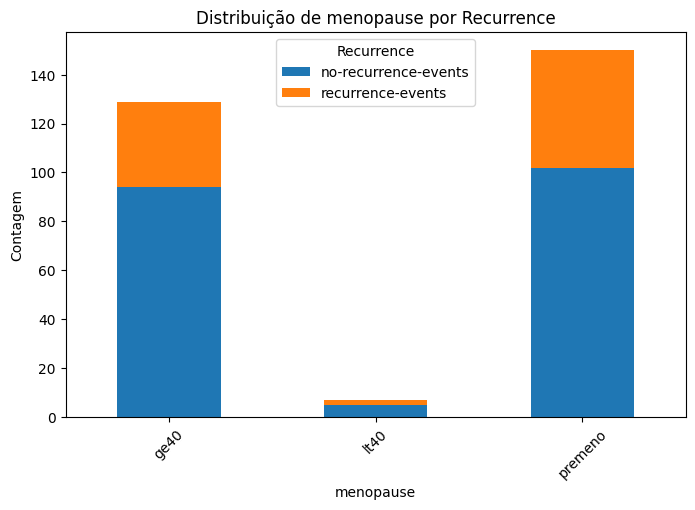

<Figure size 800x500 with 0 Axes>

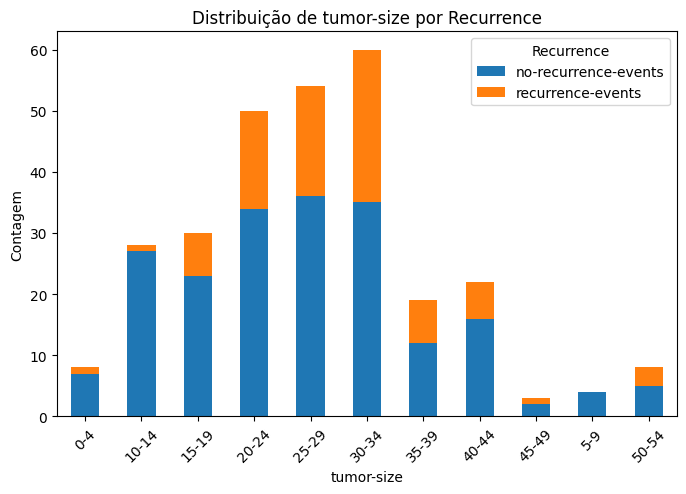

<Figure size 800x500 with 0 Axes>

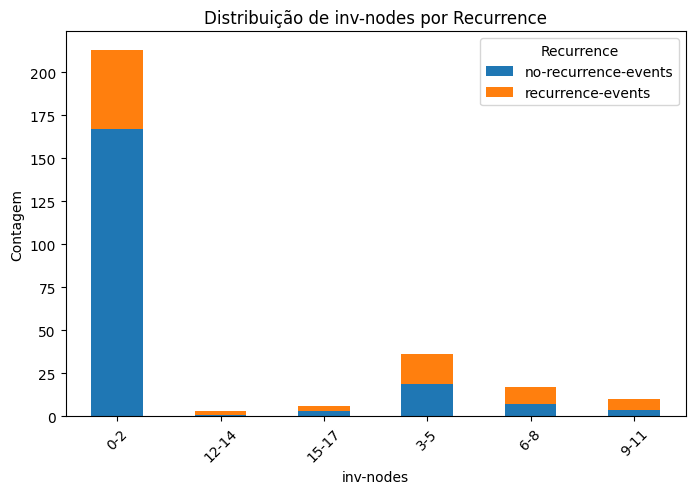

<Figure size 800x500 with 0 Axes>

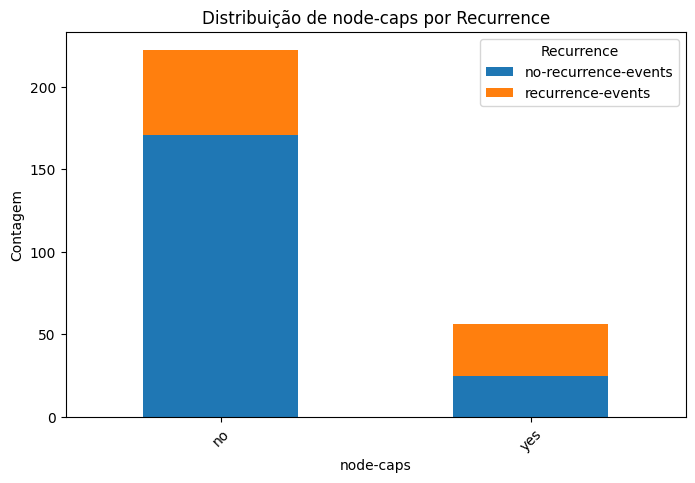

<Figure size 800x500 with 0 Axes>

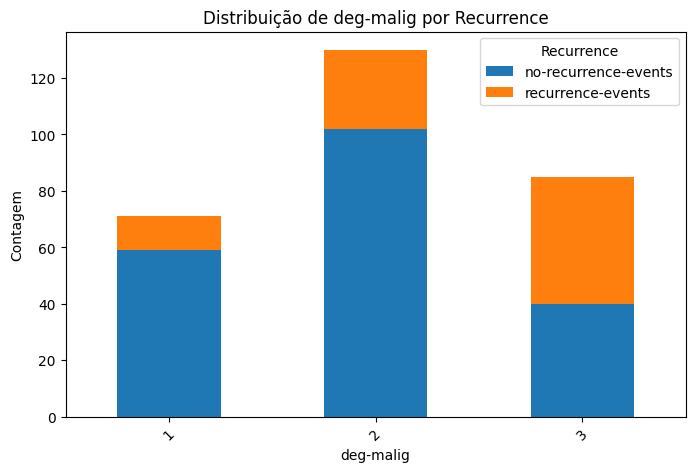

<Figure size 800x500 with 0 Axes>

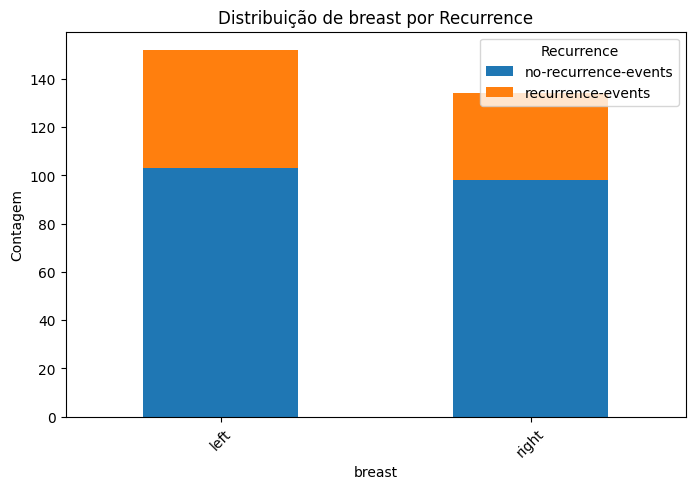

<Figure size 800x500 with 0 Axes>

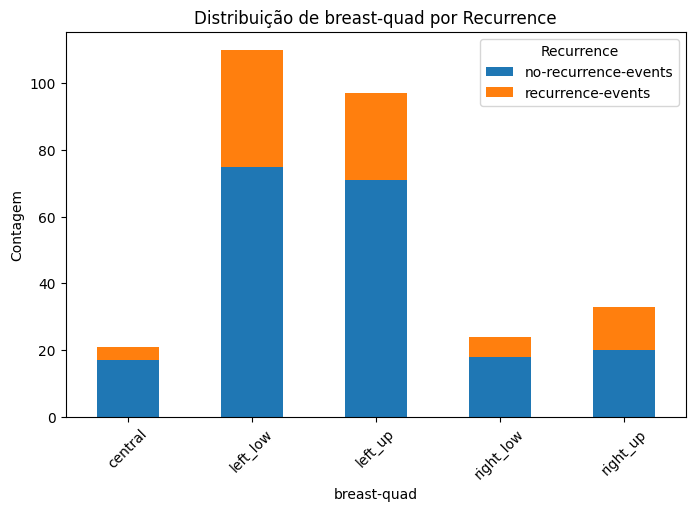

<Figure size 800x500 with 0 Axes>

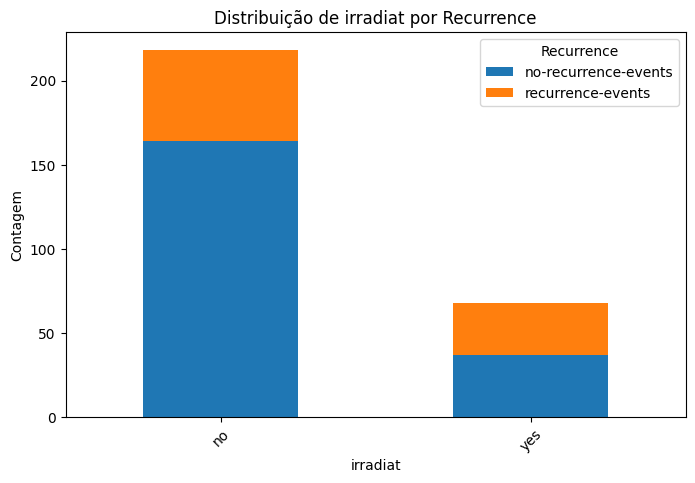

In [ ]:
# Criar gráficos de barras para mostrar a relação entre "recurrence" e as demais colunas categóricas

for column in breast_cancer.columns[1:]:  # Excluindo a própria "recurrence"
    plt.figure(figsize=(8, 5))
    breast_cancer.groupby([column, "recurrence"]).size().unstack().plot(kind="bar", stacked=True, figsize=(8, 5))
    plt.xlabel(column)
    plt.ylabel("Contagem")
    plt.title(f"Distribuição de {column} por Recurrence")
    plt.xticks(rotation=45)
    plt.legend(title="Recurrence")
    plt.show()

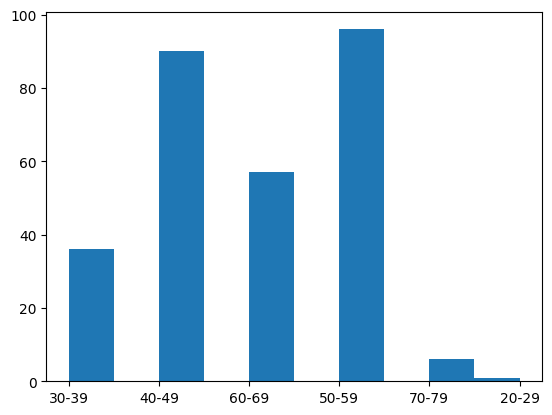

In [ ]:
plt.hist(x = breast_cancer['age']);

## Tratamento de valores faltantes

In [ ]:
breast_cancer.isnull() # identificação de valores nulos (ausentes). 0=False, 1=True

,recurrence,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
281,False,False,False,False,False,False,False,False,False,False
282,False,False,False,False,False,False,False,False,False,False
283,False,False,False,False,False,False,False,False,False,False
284,False,False,False,False,False,False,False,False,False,False


In [ ]:
breast_cancer.isnull().sum()

,0
recurrence,0
age,0
menopause,0
tumor-size,0
inv-nodes,1
node-caps,8
deg-malig,0
breast,0
breast-quad,1
irradiat,0


In [ ]:
# Preencher valores ausentes na coluna 'inv-nodes' com a moda
mode_value = breast_cancer['inv-nodes'].mode()[0]  # Obtém o valor mais frequente
breast_cancer['inv-nodes'].fillna(mode_value, inplace=True)

/tmp/ipython-input-17-491489069.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  breast_cancer['inv-nodes'].fillna(mode_value, inplace=True)


In [ ]:
# Preencher valores ausentes na coluna 'node-caps' com a moda
mode_value = breast_cancer['node-caps'].mode()[0]  # Obtém o valor mais frequente
breast_cancer['node-caps'].fillna(mode_value, inplace=True)

/tmp/ipython-input-18-3618324701.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  breast_cancer['node-caps'].fillna(mode_value, inplace=True)


In [ ]:
# Preencher valores ausentes na coluna 'breast-quad' com a moda
mode_value = breast_cancer['breast-quad'].mode()[0]  # Obtém o valor mais frequente
breast_cancer['breast-quad'].fillna(mode_value, inplace=True)

/tmp/ipython-input-19-1384639603.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  breast_cancer['breast-quad'].fillna(mode_value, inplace=True)


In [ ]:
breast_cancer.isnull().sum()

,0
recurrence,0
age,0
menopause,0
tumor-size,0
inv-nodes,0
node-caps,0
deg-malig,0
breast,0
breast-quad,0
irradiat,0


## Divisão entre previsores e classe

In [ ]:
breast_cancer.head()

,recurrence,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [ ]:
X_breast_cancer = breast_cancer.iloc[:, 1:].values

In [ ]:
X_breast_cancer

array([['30-39', 'premeno', '30-34', ..., 'left', 'left_low', 'no'],
       ['40-49', 'premeno', '20-24', ..., 'right', 'right_up', 'no'],
       ['40-49', 'premeno', '20-24', ..., 'left', 'left_low', 'no'],
       ...,
       ['60-69', 'ge40', '20-24', ..., 'right', 'left_up', 'no'],
       ['40-49', 'ge40', '30-34', ..., 'left', 'left_low', 'no'],
       ['50-59', 'ge40', '30-34', ..., 'left', 'left_low', 'no']],
      dtype=object)

In [ ]:
y_breast_cancer = breast_cancer.iloc[:, 0].values

In [ ]:
y_breast_cancer

array(['no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no

## Tratamento de atributos categóricos

### LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
X_breast_cancer

array([['30-39', 'premeno', '30-34', ..., 'left', 'left_low', 'no'],
       ['40-49', 'premeno', '20-24', ..., 'right', 'right_up', 'no'],
       ['40-49', 'premeno', '20-24', ..., 'left', 'left_low', 'no'],
       ...,
       ['60-69', 'ge40', '20-24', ..., 'right', 'left_up', 'no'],
       ['40-49', 'ge40', '30-34', ..., 'left', 'left_low', 'no'],
       ['50-59', 'ge40', '30-34', ..., 'left', 'left_low', 'no']],
      dtype=object)

In [ ]:
X_breast_cancer[0]

array(['30-39', 'premeno', '30-34', '0-2', 'no', '3', 'left', 'left_low',
       'no'], dtype=object)

In [ ]:
label_encoder_age = LabelEncoder()
label_encoder_menopause = LabelEncoder()
label_encoder_tumor_size = LabelEncoder()
label_encoder_inv_nodes = LabelEncoder()
label_encoder_node_caps = LabelEncoder()
label_encoder_deg_malig = LabelEncoder()
label_encoder_breast = LabelEncoder()
label_encoder_breast_quad = LabelEncoder()
label_encoder_irradiat = LabelEncoder()

In [ ]:
X_breast_cancer[:,0] = label_encoder_age.fit_transform(X_breast_cancer[:,0])
X_breast_cancer[:,1] = label_encoder_menopause.fit_transform(X_breast_cancer[:,1])
X_breast_cancer[:,2] = label_encoder_tumor_size.fit_transform(X_breast_cancer[:,2])
X_breast_cancer[:,3] = label_encoder_inv_nodes.fit_transform(X_breast_cancer[:,3])
X_breast_cancer[:,4] = label_encoder_node_caps.fit_transform(X_breast_cancer[:,4])
X_breast_cancer[:,5] = label_encoder_deg_malig.fit_transform(X_breast_cancer[:,5])
X_breast_cancer[:,6] = label_encoder_breast.fit_transform(X_breast_cancer[:,6])
X_breast_cancer[:,7] = label_encoder_breast_quad.fit_transform(X_breast_cancer[:,7])
X_breast_cancer[:,8] = label_encoder_irradiat.fit_transform(X_breast_cancer[:,8])

In [ ]:
X_breast_cancer

array([[1, 2, 5, ..., 0, 1, 0],
       [2, 2, 3, ..., 1, 4, 0],
       [2, 2, 3, ..., 0, 1, 0],
       ...,
       [4, 0, 3, ..., 1, 2, 0],
       [2, 0, 5, ..., 0, 1, 0],
       [3, 0, 5, ..., 0, 1, 0]], dtype=object)

In [ ]:
X_breast_cancer[0]

array([1, 2, 5, 0, 0, 2, 0, 1, 0], dtype=object)

### Salvando Label Encoder

In [ ]:
# Salvando Label Encoder para reutilização
import pickle

# Salvar todos os encoders
with open('label_encoder_age.pkl', 'wb') as f:
    pickle.dump(label_encoder_age, f)

with open('label_encoder_menopause.pkl', 'wb') as f:
    pickle.dump(label_encoder_menopause, f)

with open('label_encoder_tumor_size.pkl', 'wb') as f:
        pickle.dump(label_encoder_tumor_size, f)

with open('label_encoder_inv_nodes.pkl', 'wb') as f:
            pickle.dump(label_encoder_inv_nodes, f)

with open('label_encoder_node_caps.pkl', 'wb') as f:
                pickle.dump(label_encoder_node_caps, f)

with open('label_encoder_deg_malig.pkl', 'wb') as f:
                    pickle.dump(label_encoder_deg_malig, f)

with open('label_encoder_breast.pkl', 'wb') as f:
                        pickle.dump(label_encoder_breast, f)

with open('label_encoder_breast_quad.pkl', 'wb') as f:
                            pickle.dump(label_encoder_breast_quad, f)

with open('label_encoder_irradiat.pkl', 'wb') as f:
                                pickle.dump(label_encoder_irradiat, f)

## Escalonamento dos valores

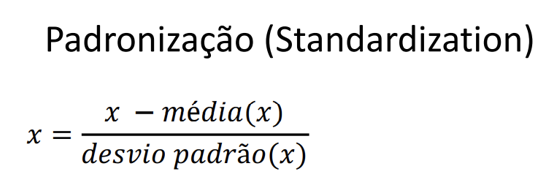

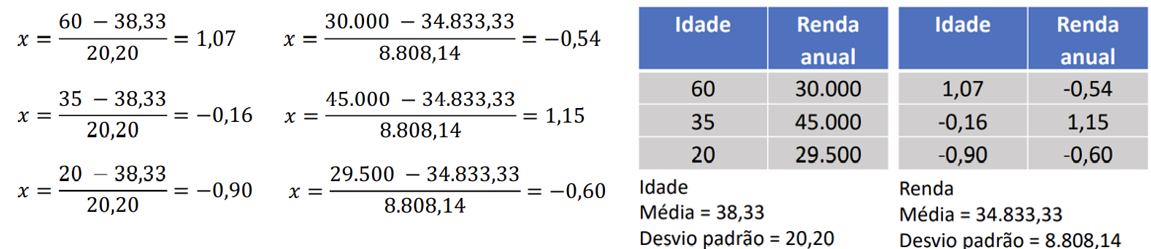

In [ ]:
X_breast_cancer

array([[1, 2, 5, ..., 0, 1, 0],
       [2, 2, 3, ..., 1, 4, 0],
       [2, 2, 3, ..., 0, 1, 0],
       ...,
       [4, 0, 3, ..., 1, 2, 0],
       [2, 0, 5, ..., 0, 1, 0],
       [3, 0, 5, ..., 0, 1, 0]], dtype=object)

In [ ]:
X_breast_cancer[:,0].min(), X_breast_cancer[:,1].min(), X_breast_cancer[:,2].min()

(0, 0, 0)

In [ ]:
X_breast_cancer[:,0].max(), X_breast_cancer[:,1].max(), X_breast_cancer[:,2].max()

(5, 2, 10)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_breast_cancer = StandardScaler()
X_breast_cancer = scaler_breast_cancer.fit_transform(X_breast_cancer)

In [ ]:
X_breast_cancer[:,0].min(), X_breast_cancer[:,1].min(), X_breast_cancer[:,2].min()

(np.float64(-2.637831226722626),
 np.float64(-1.0898248348728254),
 np.float64(-1.8920063460936598))

In [ ]:
X_breast_cancer[:,0].max(), X_breast_cancer[:,1].max(), X_breast_cancer[:,2].max()

(np.float64(2.312429474344769),
 np.float64(0.9407282776589538),
 np.float64(2.7647390496273956))

In [ ]:
X_breast_cancer

array([[-1.64777909,  0.94072828,  0.43636635, ..., -0.93892436,
        -0.71817132, -0.5585039 ],
       [-0.65772695,  0.94072828, -0.49498273, ...,  1.06504852,
         2.04501698, -0.5585039 ],
       [-0.65772695,  0.94072828, -0.49498273, ..., -0.93892436,
        -0.71817132, -0.5585039 ],
       ...,
       [ 1.32237733, -1.08982483, -0.49498273, ...,  1.06504852,
         0.20289145, -0.5585039 ],
       [-0.65772695, -1.08982483,  0.43636635, ..., -0.93892436,
        -0.71817132, -0.5585039 ],
       [ 0.33232519, -1.08982483,  0.43636635, ..., -0.93892436,
        -0.71817132, -0.5585039 ]])

In [ ]:
y_breast_cancer

array(['no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no

## Salvando Scaler para reutilização

In [ ]:
# Salvando Scaler para reutilização
import pickle

with open('scaler_breast_cancer.pkl', 'wb') as f:
    pickle.dump(scaler_breast_cancer, f)

# Divisão das bases em treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

## Breast Cancer

In [ ]:
breast_cancer

,recurrence,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,1,2,5,0,0,2,0,1,0
1,no-recurrence-events,2,2,3,0,0,1,1,4,0
2,no-recurrence-events,2,2,3,0,0,1,0,1,0
3,no-recurrence-events,4,0,2,0,0,1,1,2,0
4,no-recurrence-events,2,2,0,0,0,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,1,2,5,0,0,1,0,2,0
282,recurrence-events,1,2,3,0,0,2,0,2,1
283,recurrence-events,4,0,3,0,0,0,1,2,0
284,recurrence-events,2,0,5,3,0,2,0,1,0


In [ ]:
X_breast_cancer_treinamento, X_breast_cancer_teste, y_breast_cancer_treinamento, y_breast_cancer_teste = train_test_split(X_breast_cancer, y_breast_cancer, test_size = 0.25, random_state = 0)

In [ ]:
X_breast_cancer_treinamento.shape

(214, 9)

In [ ]:
y_breast_cancer_treinamento.shape

(214,)

In [ ]:
X_breast_cancer_teste.shape, y_breast_cancer_teste.shape # income	age	loan

((72, 9), (72,))

## Salvar as variáveis

In [ ]:
import pickle

In [ ]:
with open('breast_cancer.pkl', mode = 'wb') as f:
  pickle.dump([X_breast_cancer_treinamento, y_breast_cancer_treinamento, X_breast_cancer_teste, y_breast_cancer_teste], f)

# Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

## Breast cancer - 68.06%

In [ ]:
import pickle
with open('/content/breast_cancer.pkl', 'rb') as f:
  X_breast_cancer_treinamento, y_breast_cancer_treinamento, X_breast_cancer_teste, y_breast_cancer_teste = pickle.load(f)

In [ ]:
X_breast_cancer_treinamento.shape, y_breast_cancer_treinamento.shape

((214, 9), (214,))

In [ ]:
X_breast_cancer_teste.shape, y_breast_cancer_teste.shape

((72, 9), (72,))

In [ ]:
naive_breast_cancer = GaussianNB()
naive_breast_cancer.fit(X_breast_cancer_treinamento, y_breast_cancer_treinamento)

GaussianNB()

In [ ]:
previsoes = naive_breast_cancer.predict(X_breast_cancer_teste)

In [ ]:
previsoes

array(['no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no

In [ ]:
y_breast_cancer_teste

array(['no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
     

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_breast_cancer_teste, previsoes)

0.6805555555555556

In [ ]:
confusion_matrix(y_breast_cancer_teste, previsoes)

array([[40,  7],
       [16,  9]])

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.6805555555555556

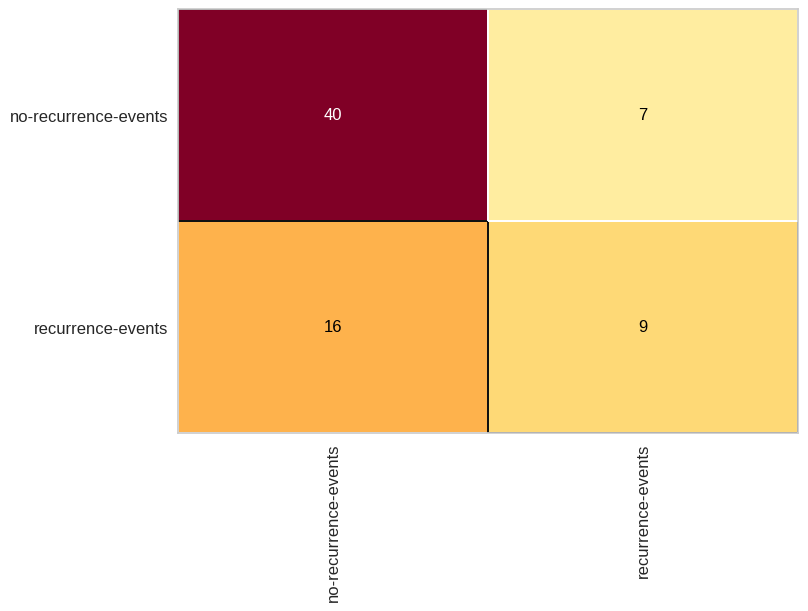

In [ ]:
cm = ConfusionMatrix(naive_breast_cancer)
cm.fit(X_breast_cancer_treinamento, y_breast_cancer_treinamento)
cm.score(X_breast_cancer_teste, y_breast_cancer_teste)

In [ ]:
print(classification_report(y_breast_cancer_teste, previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.71      0.85      0.78        47
   recurrence-events       0.56      0.36      0.44        25

            accuracy                           0.68        72
           macro avg       0.64      0.61      0.61        72
        weighted avg       0.66      0.68      0.66        72



# Árvores de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

## Breast Cancer - 55.56%

In [ ]:
import pickle
with open('breast_cancer.pkl', 'rb') as f:
  X_breast_cancer_treinamento, y_breast_cancer_treinamento, X_breast_cancer_teste, y_breast_cancer_teste = pickle.load(f)

In [ ]:
X_breast_cancer_treinamento.shape, y_breast_cancer_treinamento.shape

((214, 9), (214,))

In [ ]:
X_breast_cancer_teste.shape, y_breast_cancer_teste.shape

((72, 9), (72,))

In [ ]:
arvore_breast_cancer = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arvore_breast_cancer.fit(X_breast_cancer_treinamento, y_breast_cancer_treinamento)
'''
Definir random_state=0 (ou qualquer outro inteiro) faz com que a construção da árvore de decisão seja determinística, ou seja,
os mesmos resultados serão obtidos todas as vezes que o código for executado
'''

'\nDefinir random_state=0 (ou qualquer outro inteiro) faz com que a construção da árvore de decisão seja determinística, ou seja,\nos mesmos resultados serão obtidos todas as vezes que o código for executado\n'

In [ ]:
previsoes = arvore_breast_cancer.predict(X_breast_cancer_teste)
previsoes

array(['no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'recurrence-events', 'recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-even

In [ ]:
y_breast_cancer_teste

array(['no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
     

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_breast_cancer_teste, previsoes)

0.5555555555555556

0.5555555555555556

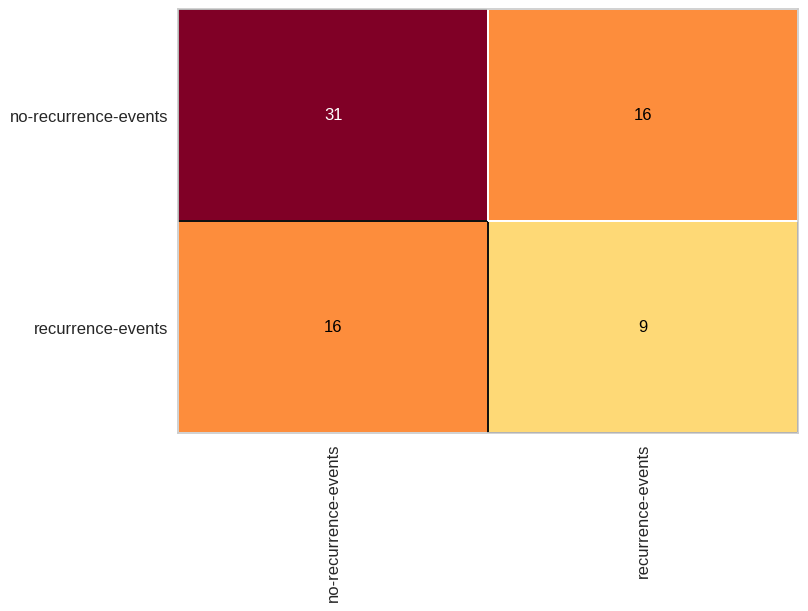

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_breast_cancer)
cm.fit(X_breast_cancer_treinamento, y_breast_cancer_treinamento)
cm.score(X_breast_cancer_teste, y_breast_cancer_teste)

In [ ]:
print(classification_report(y_breast_cancer_teste, previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.66      0.66      0.66        47
   recurrence-events       0.36      0.36      0.36        25

            accuracy                           0.56        72
           macro avg       0.51      0.51      0.51        72
        weighted avg       0.56      0.56      0.56        72



In [ ]:
breast_cancer.columns

Index(['recurrence', 'age', 'menopause', 'tumor-size', 'inv-nodes',
       'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')

In [ ]:
arvore_breast_cancer.feature_importances_ # menopause foi a feature mais importante

array([0.16553054, 0.06887009, 0.26038621, 0.07473587, 0.04962633,
       0.10772042, 0.04317068, 0.1829619 , 0.04699797])

In [ ]:
arvore_breast_cancer.classes_

array(['no-recurrence-events', 'recurrence-events'], dtype=object)

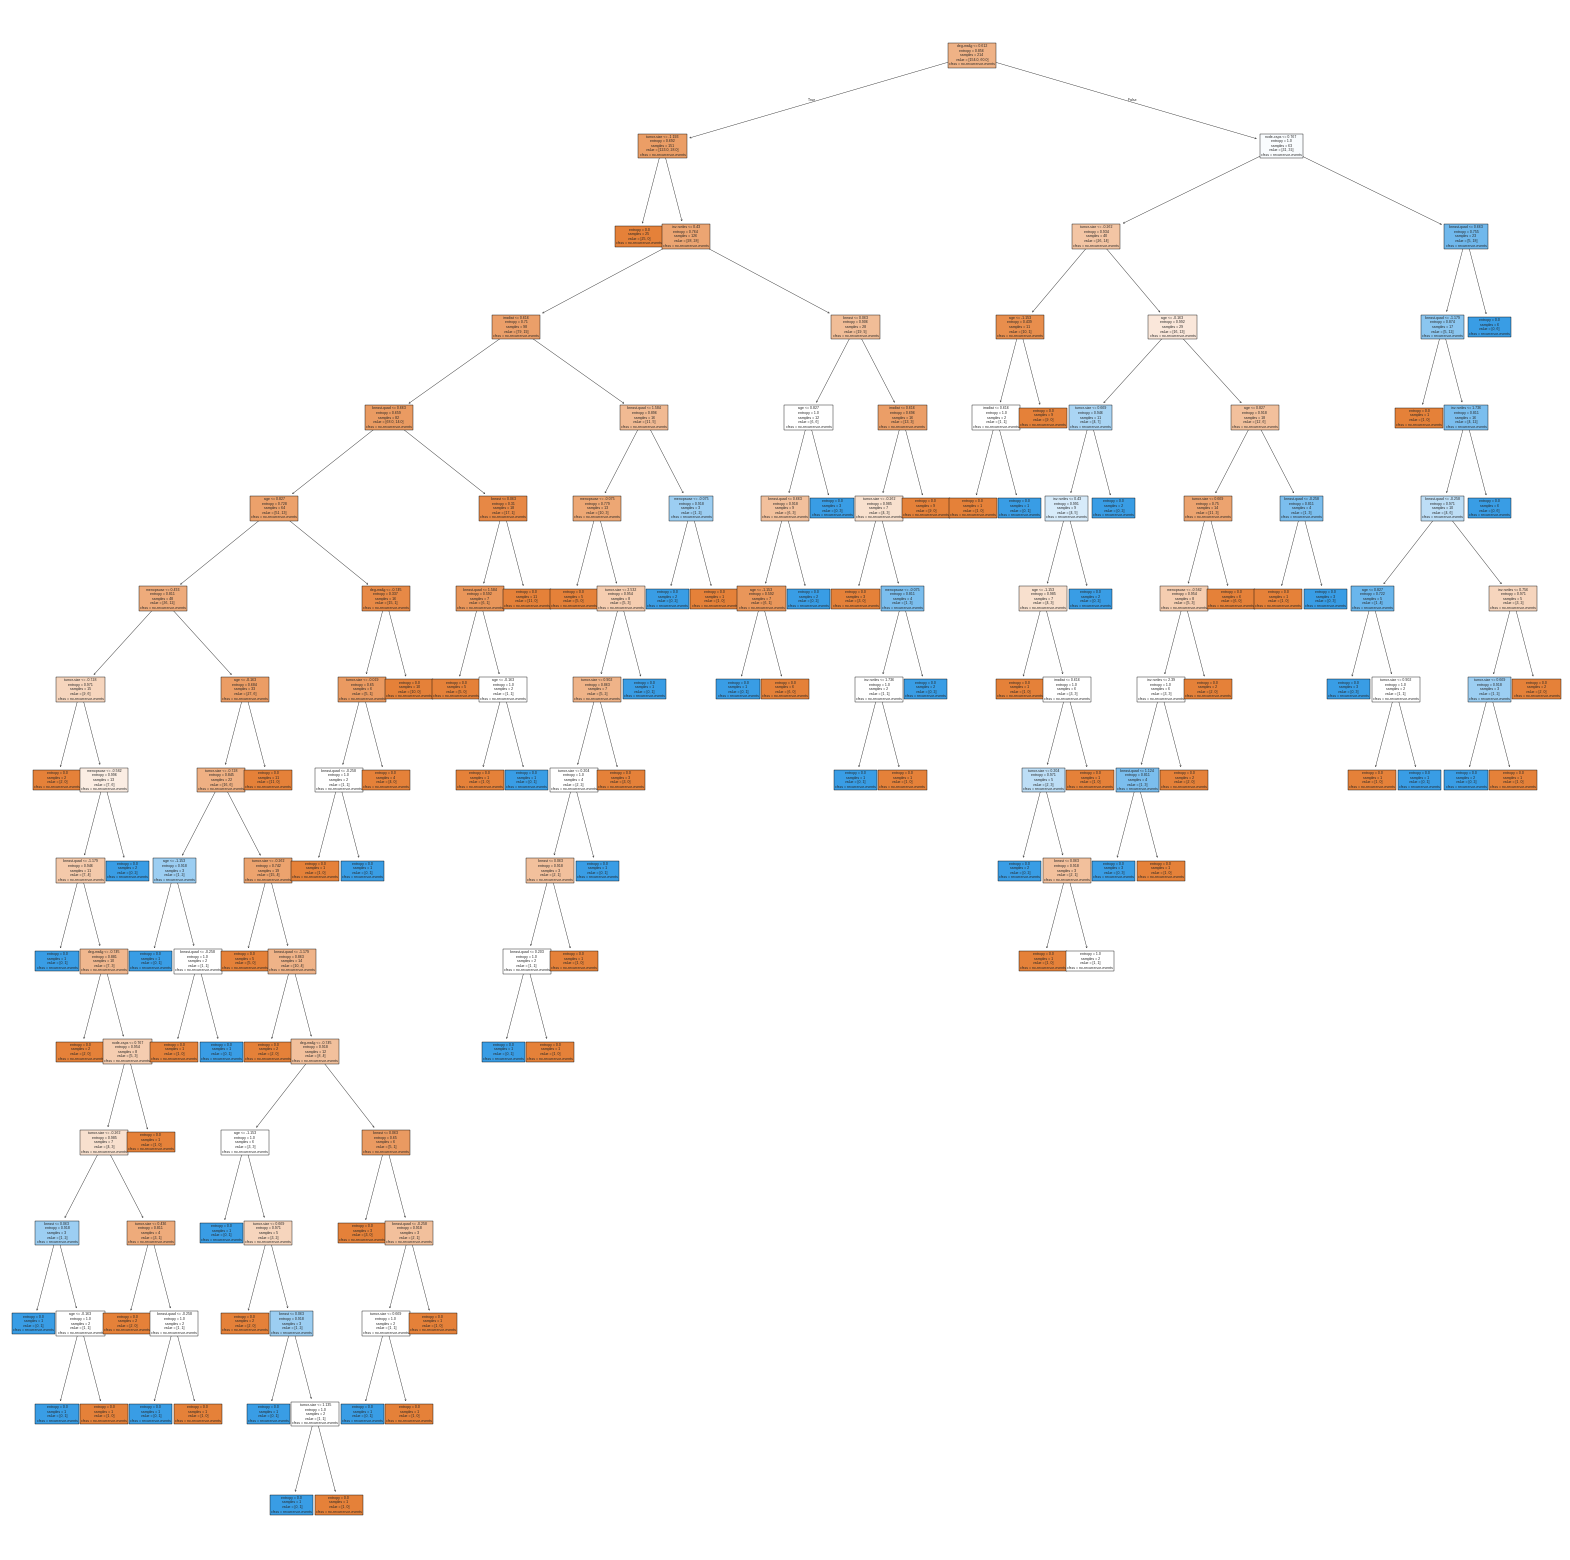

In [ ]:
from sklearn import tree
previsores = ['age', 'menopause', 'tumor-size', 'inv-nodes',
       'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(arvore_breast_cancer, feature_names=previsores, class_names=['no-recurrence-events', 'recurrence-events'], filled=True);
fig.savefig('arvore_credit.png')

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## Breast Cancer - 76.39%

In [ ]:
import pickle
with open('breast_cancer.pkl', 'rb') as f:
  X_breast_cancer_treinamento, y_breast_cancer_treinamento, X_breast_cancer_teste, y_breast_cancer_teste = pickle.load(f)

In [ ]:
X_breast_cancer_treinamento.shape, y_breast_cancer_treinamento.shape

((214, 9), (214,))

In [ ]:
X_breast_cancer_teste.shape, y_breast_cancer_teste.shape

((72, 9), (72,))

In [ ]:
random_forest_breast_cancer = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
random_forest_breast_cancer.fit(X_breast_cancer_treinamento, y_breast_cancer_treinamento)
'''
n_estimators=40: Especifica o número de árvores na floresta. Neste caso, o modelo será composto por 40 árvores de decisão independentes.
O número de árvores geralmente afeta a precisão do modelo: mais árvores podem melhorar o desempenho até certo ponto, mas também aumentam o tempo de computação.
'''

'\nn_estimators=40: Especifica o número de árvores na floresta. Neste caso, o modelo será composto por 40 árvores de decisão independentes.\nO número de árvores geralmente afeta a precisão do modelo: mais árvores podem melhorar o desempenho até certo ponto, mas também aumentam o tempo de computação.\n'

In [ ]:
previsoes = random_forest_breast_cancer.predict(X_breast_cancer_teste)
previsoes

array(['no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 

In [ ]:
y_breast_cancer_teste

array(['no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
     

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_breast_cancer_teste, previsoes)

0.7638888888888888

0.7638888888888888

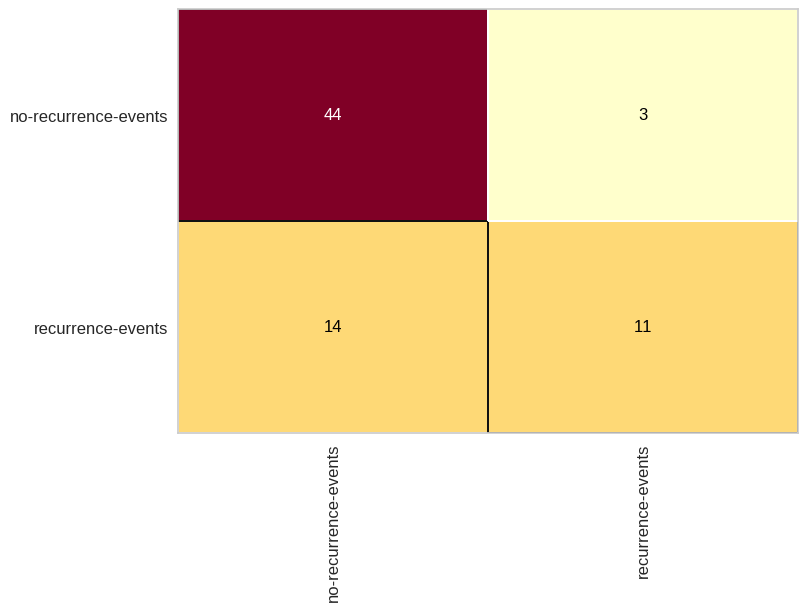

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_breast_cancer)
cm.fit(X_breast_cancer_treinamento, y_breast_cancer_treinamento)
cm.score(X_breast_cancer_teste, y_breast_cancer_teste)

In [ ]:
print(classification_report(y_breast_cancer_teste, previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.76      0.94      0.84        47
   recurrence-events       0.79      0.44      0.56        25

            accuracy                           0.76        72
           macro avg       0.77      0.69      0.70        72
        weighted avg       0.77      0.76      0.74        72



# Aprendizagem baseada em instâncias - knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## Breast Cancer

In [ ]:
import pickle
with open('breast_cancer.pkl', 'rb') as f:
  X_breast_cancer_treinamento, y_breast_cancer_treinamento, X_breast_cancer_teste, y_breast_cancer_teste = pickle.load(f)

In [ ]:
X_breast_cancer_treinamento.shape, y_breast_cancer_treinamento.shape

((214, 9), (214,))

In [ ]:
X_breast_cancer_teste.shape, y_breast_cancer_teste.shape

((72, 9), (72,))

In [ ]:
knn_breast_cancer = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
'''
metric='minkowski': Especifica a métrica de distância a ser utilizada.
É uma generalização das métricas de distância Euclidiana e de Manhattan.
p=2: a métrica de Minkowski equivale à distância Euclidiana.
p=1, ela equivale à distância de Manhattan.
'''
knn_breast_cancer.fit(X_breast_cancer_treinamento, y_breast_cancer_treinamento)

KNeighborsClassifier()

In [ ]:
previsoes = knn_breast_cancer.predict(X_breast_cancer_teste)
previsoes

array(['no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-eve

In [ ]:
y_breast_cancer_teste

array(['no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
     

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_breast_cancer_teste, previsoes) # padronização

0.6527777777777778

0.6527777777777778

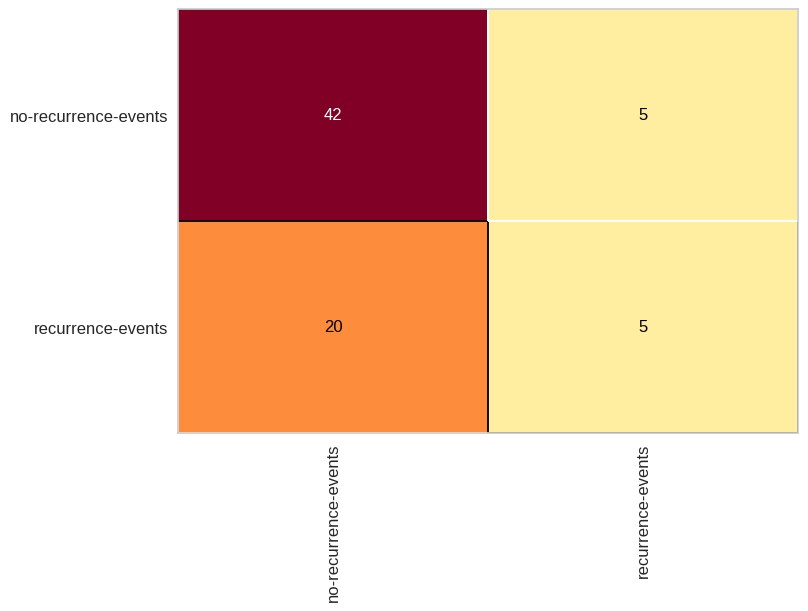

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_bre ast_cancer)
cm.fit(X_breast_cancer_treinamento, y_breast_cancer_treinamento)
cm.score(X_breast_cancer_teste, y_breast_cancer_teste)

In [ ]:
print(classification_report(y_breast_cancer_teste, previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.68      0.89      0.77        47
   recurrence-events       0.50      0.20      0.29        25

            accuracy                           0.65        72
           macro avg       0.59      0.55      0.53        72
        weighted avg       0.62      0.65      0.60        72



# Regressão logística

In [ ]:
from sklearn.linear_model import LogisticRegression

## Breast Cancer - 66.67%

In [ ]:
import pickle
with open('breast_cancer.pkl', 'rb') as f:
  X_breast_cancer_treinamento, y_breast_cancer_treinamento, X_breast_cancer_teste, y_breast_cancer_teste = pickle.load(f)

In [ ]:
X_breast_cancer_treinamento.shape, y_breast_cancer_treinamento.shape

((214, 9), (214,))

In [ ]:
X_breast_cancer_teste.shape, y_breast_cancer_teste.shape

((72, 9), (72,))

In [ ]:
logistic_breast_cancer = LogisticRegression(random_state=1)
logistic_breast_cancer.fit(X_breast_cancer_treinamento, y_breast_cancer_treinamento)

LogisticRegression(random_state=1)

In [ ]:
logistic_breast_cancer.intercept_ # b0

array([-1.12294509])

In [ ]:
logistic_breast_cancer.coef_ # b1, ... , b9

array([[-0.25513988, -0.05812618,  0.22775324,  0.26202602,  0.28561145,
         0.39092333, -0.09946498,  0.15850626,  0.11343618]])

In [ ]:
previsoes = logistic_breast_cancer.predict(X_breast_cancer_teste)
previsoes

array(['no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-eve

In [ ]:
y_breast_cancer_teste

array(['no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
     

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_breast_cancer_teste, previsoes)

0.6666666666666666

0.6666666666666666

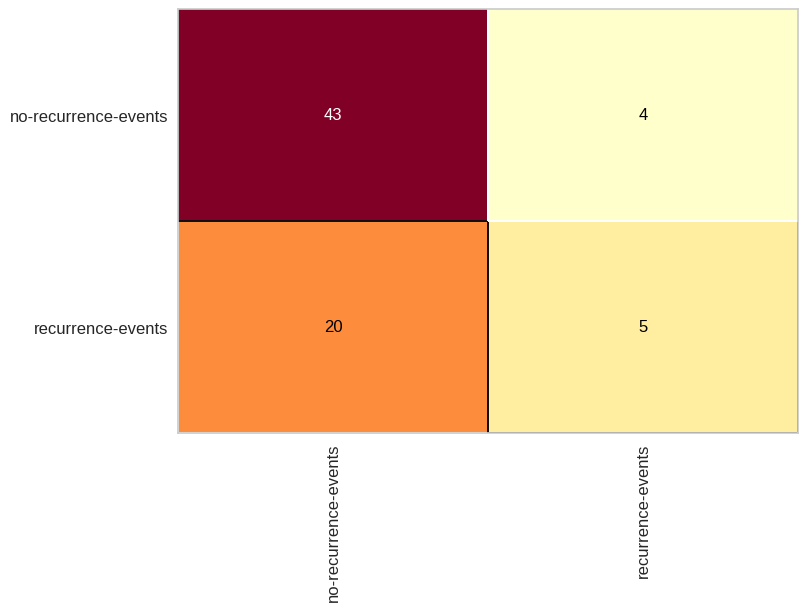

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_breast_cancer)
cm.fit(X_breast_cancer_treinamento, y_breast_cancer_treinamento)
cm.score(X_breast_cancer_teste, y_breast_cancer_teste)

In [ ]:
print(classification_report(y_breast_cancer_teste, previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.68      0.91      0.78        47
   recurrence-events       0.56      0.20      0.29        25

            accuracy                           0.67        72
           macro avg       0.62      0.56      0.54        72
        weighted avg       0.64      0.67      0.61        72



# SVM

In [ ]:
from sklearn.svm import SVC

## Breast Cancer - 69.44%

In [ ]:
import pickle
with open('breast_cancer.pkl', 'rb') as f:
  X_breast_cancer_treinamento, y_breast_cancer_treinamento, X_breast_cancer_teste, y_breast_cancer_teste = pickle.load(f)

In [ ]:
X_breast_cancer_treinamento.shape, y_breast_cancer_treinamento.shape

((214, 9), (214,))

In [ ]:
X_breast_cancer_teste.shape, y_breast_cancer_teste.shape

((72, 9), (72,))

In [ ]:
svm_breast_cancer = SVC(kernel='rbf', random_state=1, C = 2.0) # 2 -> 4
svm_breast_cancer.fit(X_breast_cancer_treinamento, y_breast_cancer_treinamento)

SVC(C=2.0, random_state=1)

In [ ]:
previsoes = svm_breast_cancer.predict(X_breast_cancer_teste)
previsoes

array(['no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recur

In [ ]:
y_breast_cancer_teste

array(['no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
     

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_breast_cancer_teste, previsoes)

0.6944444444444444

0.6944444444444444

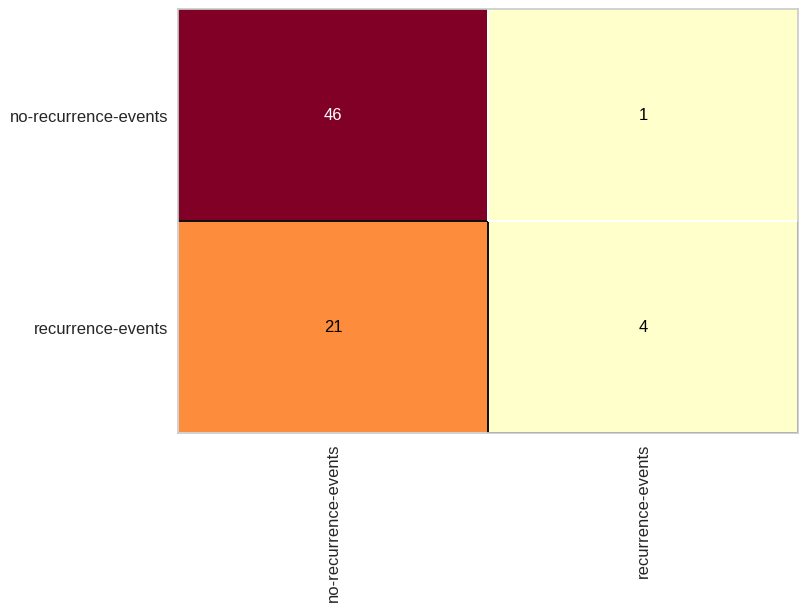

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_breast_cancer)
cm.fit(X_breast_cancer_treinamento, y_breast_cancer_treinamento)
cm.score(X_breast_cancer_teste, y_breast_cancer_teste)

In [ ]:
print(classification_report(y_breast_cancer_teste, previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.69      0.98      0.81        47
   recurrence-events       0.80      0.16      0.27        25

            accuracy                           0.69        72
           macro avg       0.74      0.57      0.54        72
        weighted avg       0.73      0.69      0.62        72



# Redes neurais artificiais

In [ ]:
from sklearn.neural_network import MLPClassifier

## Breast Cancer - 73.61%

In [ ]:
import pickle
with open('breast_cancer.pkl', 'rb') as f:
  X_breast_cancer_treinamento, y_breast_cancer_treinamento, X_breast_cancer_teste, y_breast_cancer_teste = pickle.load(f)

In [ ]:
X_breast_cancer_treinamento.shape, y_breast_cancer_treinamento.shape

((214, 9), (214,))

In [ ]:
X_breast_cancer_teste.shape, y_breast_cancer_teste.shape

((72, 9), (72,))

In [ ]:
(3 + 1) / 2

2.0

In [ ]:
# 3 -> 100 -> 100 -> 1
# 3 -> 2 -> 2 -> 1
rede_neural_breast_cancer = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20))
rede_neural_breast_cancer.fit(X_breast_cancer_treinamento, y_breast_cancer_treinamento)

Iteration 1, loss = 0.78018960
Iteration 2, loss = 0.76895903
Iteration 3, loss = 0.75940411
Iteration 4, loss = 0.75082061
Iteration 5, loss = 0.74240594
Iteration 6, loss = 0.73514891
Iteration 7, loss = 0.72804658
Iteration 8, loss = 0.72136563
Iteration 9, loss = 0.71489612
Iteration 10, loss = 0.70885125
Iteration 11, loss = 0.70308274
Iteration 12, loss = 0.69722564
Iteration 13, loss = 0.69179417
Iteration 14, loss = 0.68640509
Iteration 15, loss = 0.68104509
Iteration 16, loss = 0.67555054
Iteration 17, loss = 0.67020724
Iteration 18, loss = 0.66524778
Iteration 19, loss = 0.66028879
Iteration 20, loss = 0.65573276
Iteration 21, loss = 0.65117462
Iteration 22, loss = 0.64690096
Iteration 23, loss = 0.64267941
Iteration 24, loss = 0.63856287
Iteration 25, loss = 0.63444618
Iteration 26, loss = 0.63067377
Iteration 27, loss = 0.62671472
Iteration 28, loss = 0.62303040
Iteration 29, loss = 0.61941514
Iteration 30, loss = 0.61600257
Iteration 31, loss = 0.61251523
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1500, tol=1e-05,
              verbose=True)

In [ ]:
previsoes = rede_neural_breast_cancer.predict(X_breast_cancer_teste)
previsoes

array(['no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-eve

In [ ]:
y_breast_cancer_teste

array(['no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
     

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_breast_cancer_teste, previsoes)

0.7361111111111112

0.7361111111111112

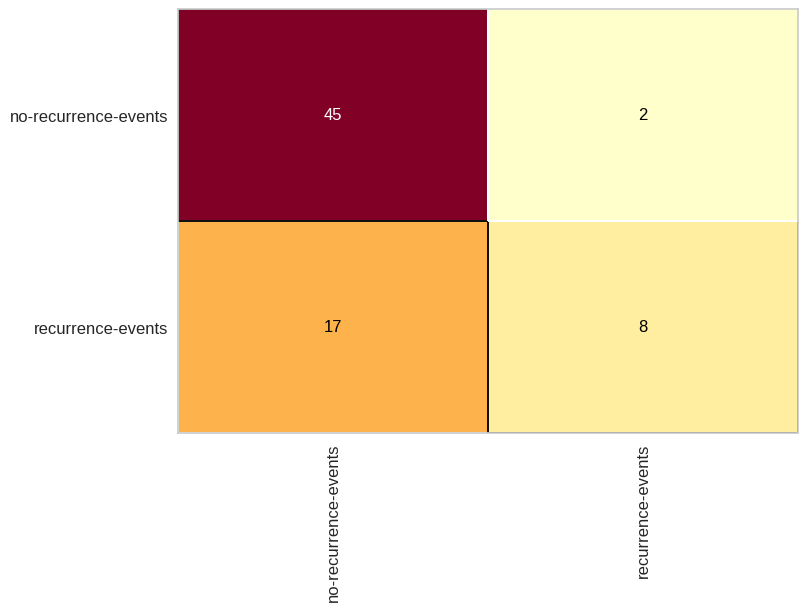

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_breast_cancer)
cm.fit(X_breast_cancer_treinamento, y_breast_cancer_treinamento)
cm.score(X_breast_cancer_teste, y_breast_cancer_teste)

In [ ]:
print(classification_report(y_breast_cancer_teste, previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.71      0.79      0.75        47
   recurrence-events       0.50      0.40      0.44        25

            accuracy                           0.65        72
           macro avg       0.61      0.59      0.60        72
        weighted avg       0.64      0.65      0.64        72



# Avaliação dos algoritmos

- Naïve Bayes: 68.06%
- Árvore de decisão: 55.56%
- Random forest: 76.39%
- Knn: 65.28%
- Regressão logística: 66.67%
- SVM: 69.44%
- Redes neurais: 73.61%

## Tuning dos parâmetros com GridSearch

### Preparação dos dados

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0)
X_credit.shape

(2000, 3)

In [ ]:
X_credit

array([[-1.3754462 ,  0.50631087,  0.10980934],
       [ 1.45826409, -1.6489393 , -1.21501497],
       [-0.79356829,  0.22531191, -0.43370226],
       ...,
       [ 1.37445674, -1.05746281, -1.12564819],
       [-1.57087737, -0.63488173, -0.36981671],
       [-1.03572293, -0.93978122,  0.04244312]])

In [ ]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)
y_credit.shape

(2000,)

In [ ]:
y_credit

array([0, 0, 0, ..., 0, 1, 1])

### Árvore de decisão

In [ ]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [ ]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


### Random forest

In [ ]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.9855


### Knn

In [ ]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [ ]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


### Regressão logística

In [ ]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [ ]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


### SVM

In [ ]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [ ]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


### Redes neurais

In [ ]:
parametros = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [ ]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

In [ ]:
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'relu', 'batch_size': 56, 'solver': 'adam'}
0.9970000000000001


## Validação cruzada

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
10 * 30

300

In [ ]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
  scores = cross_val_score(arvore, X_credit, y_credit, cv = kfold)
  #print(scores)
  #print(scores.mean())
  resultados_arvore.append(scores.mean())

  random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split=5, n_estimators = 10)
  scores = cross_val_score(random_forest, X_credit, y_credit, cv = kfold)
  resultados_random_forest.append(scores.mean())

  knn = KNeighborsClassifier()
  scores = cross_val_score(knn, X_credit, y_credit, cv = kfold)
  resultados_knn.append(scores.mean())

  logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
  scores = cross_val_score(logistica, X_credit, y_credit, cv = kfold)
  resultados_logistica.append(scores.mean())

  svm = SVC(kernel = 'rbf', C = 2.0)
  scores = cross_val_score(svm, X_credit, y_credit, cv = kfold)
  resultados_svm.append(scores.mean())

  rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
  scores = cross_val_score(rede_neural, X_credit, y_credit, cv = kfold)
  resultados_rede_neural.append(scores.mean())


0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

15


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

16


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

17


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

18


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

19


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

20


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

21


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

22


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

23


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

24


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

25


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

26


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

27


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

28


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

29


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

In [ ]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Logistica': resultados_logistica,
                           'SVM': resultados_svm, 'Rede neural': resultados_rede_neural})
resultados

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
0,0.9865,0.9810,0.9815,0.9475,0.9845,0.9960
1,0.9855,0.9805,0.9800,0.9465,0.9840,0.9980
2,0.9905,0.9840,0.9795,0.9470,0.9865,0.9975
3,0.9875,0.9855,0.9780,0.9460,0.9850,0.9965
4,0.9885,0.9860,0.9820,0.9465,0.9850,0.9965
5,0.9885,0.9860,0.9780,0.9465,0.9845,0.9970
6,0.9880,0.9845,0.9805,0.9470,0.9860,0.9970
7,0.9875,0.9830,0.9800,0.9480,0.9850,0.9975
8,0.9865,0.9830,0.9795,0.9465,0.9840,0.9965
9,0.9870,0.9870,0.9820,0.9465,0.9845,0.9975


In [ ]:
resultados.describe()

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987200,0.983933,0.980050,0.946950,0.985083,0.997133
std,0.001740,0.001879,0.001533,0.000687,0.001280,0.000454
min,0.983000,0.980500,0.977000,0.945500,0.982000,0.996000
25%,0.986500,0.983125,0.979000,0.946500,0.984125,0.997000
50%,0.987500,0.984250,0.980000,0.947000,0.985000,0.997000
75%,0.988375,0.985375,0.981000,0.947500,0.986375,0.997500
max,0.990500,0.987500,0.982500,0.948500,0.987500,0.998000


In [ ]:
resultados.var()

Arvore           3.027586e-06
Random forest    3.529885e-06
KNN              2.350862e-06
Logistica        4.715517e-07
SVM              1.639368e-06
Rede neural      2.057471e-07
dtype: float64

In [ ]:
(resultados.std() / resultados.mean()) * 100

Arvore           0.176256
Random forest    0.190948
KNN              0.156446
Logistica        0.072517
SVM              0.129977
Rede neural      0.045490
dtype: float64

## Teste de normalidade nos resultados

- Shapiro: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

In [ ]:
alpha = 0.05

In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_rede_neural)

(ShapiroResult(statistic=0.9444820880889893, pvalue=0.1201295480132103),
 ShapiroResult(statistic=0.9421250820159912, pvalue=0.10377833992242813),
 ShapiroResult(statistic=0.9584026336669922, pvalue=0.28181564807891846),
 ShapiroResult(statistic=0.9370993375778198, pvalue=0.07600117474794388),
 ShapiroResult(statistic=0.962294340133667, pvalue=0.35407164692878723),
 ShapiroResult(statistic=0.8676660656929016, pvalue=0.0014870468294247985))

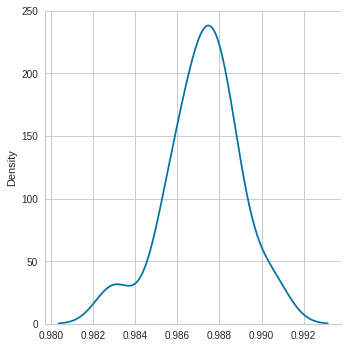

In [ ]:
sns.displot(resultados_arvore, kind = 'kde');

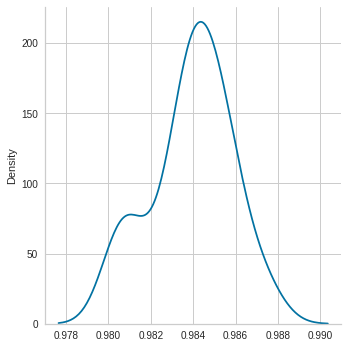

In [ ]:
sns.displot(resultados_random_forest, kind = 'kde');

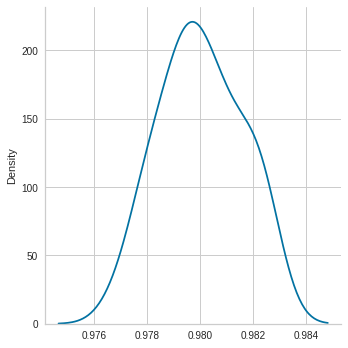

In [ ]:
sns.displot(resultados_knn, kind = 'kde');

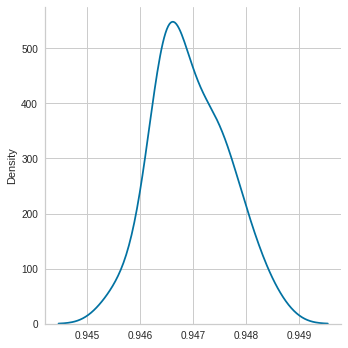

In [ ]:
sns.displot(resultados_logistica, kind = 'kde');

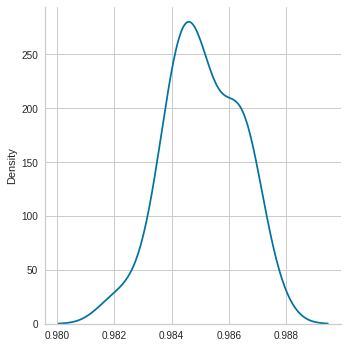

In [ ]:
sns.displot(resultados_svm, kind = 'kde');

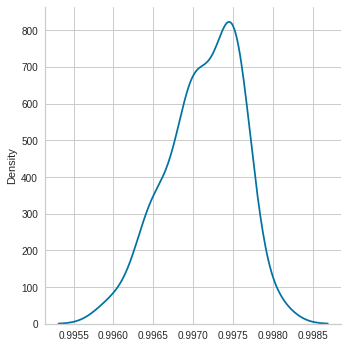

In [ ]:
sns.displot(resultados_rede_neural, kind = 'kde');

## Teste de hipótese com ANOVA e Tukey

In [ ]:
from scipy.stats import f_oneway

In [ ]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural)
p

6.492589473829715e-184

In [ ]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')

Hipótese nula rejeitada. Dados são diferentes


In [ ]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                          'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}

In [ ]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.9865,arvore
1,0.9855,arvore
2,0.9905,arvore
3,0.9875,arvore
4,0.9885,arvore
...,...,...
175,0.9975,rede_neural
176,0.9970,rede_neural
177,0.9965,rede_neural
178,0.9970,rede_neural


In [ ]:
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [ ]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn  -0.0071  0.001 -0.0082 -0.0061   True
       arvore     logistica  -0.0402  0.001 -0.0413 -0.0392   True
       arvore random_forest  -0.0033  0.001 -0.0043 -0.0022   True
       arvore   rede_neural   0.0099  0.001  0.0089   0.011   True
       arvore           svm  -0.0021  0.001 -0.0031 -0.0011   True
          knn     logistica  -0.0331  0.001 -0.0341 -0.0321   True
          knn random_forest   0.0039  0.001  0.0029  0.0049   True
          knn   rede_neural   0.0171  0.001  0.0161  0.0181   True
          knn           svm    0.005  0.001   0.004  0.0061   True
    logistica random_forest    0.037  0.001   0.036   0.038   True
    logistica   rede_neural   0.0502  0.001  0.0492  0.0512   True
    logistica           svm   0.0381  0.001  0.0371  0.0392   

In [ ]:
resultados.mean()

Arvore           0.987200
Random forest    0.983933
KNN              0.980050
Logistica        0.946950
SVM              0.985083
Rede neural      0.997133
dtype: float64

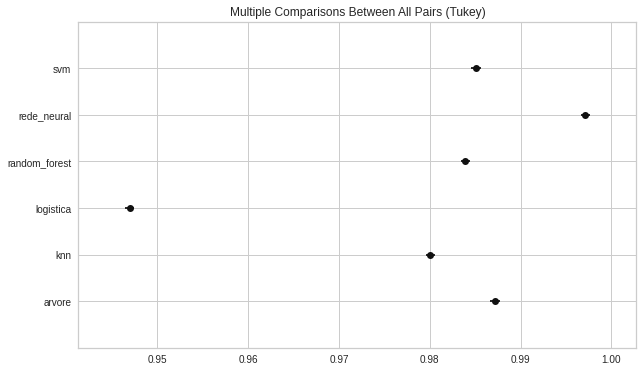

In [ ]:
teste_estatistico.plot_simultaneous();

# Salvar um classificador já treinado

In [ ]:
with open('breast_cancer.pkl', 'rb') as f:
  X_breast_cancer_treinamento, y_breast_cancer_treinamento, X_breast_cancer_teste, y_breast_cancer_teste = pickle.load(f)

In [ ]:
X_breast_cancer = np.concatenate((X_breast_cancer_treinamento, X_breast_cancer_teste), axis = 0)
y_breast_cancer = np.concatenate((y_breast_cancer_treinamento, y_breast_cancer_teste), axis = 0)

In [ ]:
X_breast_cancer.shape, y_breast_cancer.shape

((286, 9), (286,))

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
classificador_rede_neural = MLPClassifier(activation='relu', batch_size = 56, solver='adam')
classificador_rede_neural.fit(X_breast_cancer, y_breast_cancer)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=56)

In [ ]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
classificador_arvore.fit(X_breast_cancer, y_breast_cancer)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [ ]:
classificador_svm = SVC(C = 2.0, kernel='rbf', probability=True)
classificador_svm.fit(X_breast_cancer, y_breast_cancer)

SVC(C=2.0, probability=True)

In [ ]:
import pickle
pickle.dump(classificador_rede_neural, open('rede_neural_finalizado.sav', 'wb'))
pickle.dump(classificador_arvore, open('arvore_finalizado.sav', 'wb'))
pickle.dump(classificador_svm, open('svm_finalizado.sav', 'wb'))

# Carregando Label Encoder e Scaler para reutilização

In [ ]:
import joblib

# Carregar o LabelEncoder salvo
label_encoder_age = joblib.load("/content/label_encoder_age.pkl")
label_encoder_menopause = joblib.load("/content/label_encoder_menopause.pkl")
label_encoder_tumor_size = joblib.load("/content/label_encoder_tumor_size.pkl")
label_encoder_breast = joblib.load("/content/label_encoder_breast.pkl")
label_encoder_breast_quad = joblib.load("/content/label_encoder_breast_quad.pkl")
label_encoder_inv_nodes = joblib.load("/content/label_encoder_inv_nodes.pkl")
label_encoder_node_caps = joblib.load("/content/label_encoder_node_caps.pkl")
label_encoder_deg_malig = joblib.load("/content/label_encoder_deg_malig.pkl")

In [ ]:
# Carregar o scaler salvo
with open('scaler_breast_cancer.pkl', 'rb') as f:
    scaler = pickle.load(f)

In [ ]:
# Carregar o novo registro
novo_registro = breast_cancer_original.iloc[[285]]
novo_registro

,recurrence,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
285,recurrence-events,50-59,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
novo_registro = novo_registro.iloc[:, 1:]
novo_registro

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
285,50-59,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
# Aplicando o LabelEncoder ao novo_registro
novo_registro['age'] = label_encoder_age.transform(novo_registro['age'])
novo_registro['menopause'] = label_encoder_menopause.transform(novo_registro['menopause'])
novo_registro['tumor-size'] = label_encoder_tumor_size.transform(novo_registro['tumor-size'])
novo_registro['inv-nodes'] = label_encoder_inv_nodes.transform(novo_registro['inv-nodes'])
novo_registro['node-caps'] = label_encoder_node_caps.transform(novo_registro['node-caps'])
novo_registro['deg-malig'] = label_encoder_deg_malig.transform(novo_registro['deg-malig'])
novo_registro['breast'] = label_encoder_breast.transform(novo_registro['breast'])
novo_registro['breast-quad'] = label_encoder_breast_quad.transform(novo_registro['breast-quad'])
novo_registro['irradiat'] = label_encoder_irradiat.transform(novo_registro['irradiat'])
novo_registro

<ipython-input-161-020dc1b63eb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novo_registro['age'] = label_encoder_age.transform(novo_registro['age'])
<ipython-input-161-020dc1b63eb0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novo_registro['menopause'] = label_encoder_menopause.transform(novo_registro['menopause'])
<ipython-input-161-020dc1b63eb0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
285,3,0,5,3,0,2,0,1,0


In [ ]:
# Aplicando o Scaler no novo_registro
novo_registro = scaler.transform(novo_registro)
novo_registro

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[ 0.33232519, -1.08982483,  0.43636635,  1.40958351, -0.49343516,
         1.29056424, -0.93892436, -0.71817132, -0.5585039 ]])

# Carregar um classificador já treinado

In [ ]:
rede_neural = pickle.load(open('rede_neural_finalizado.sav', 'rb'))
arvore = pickle.load(open('arvore_finalizado.sav', 'rb'))
svm = pickle.load(open('svm_finalizado.sav', 'rb'))

In [ ]:
novo_registro.shape

(1, 9)

In [ ]:
novo_registro

array([[ 0.33232519, -1.08982483,  0.43636635,  1.40958351, -0.49343516,
         1.29056424, -0.93892436, -0.71817132, -0.5585039 ]])

In [ ]:
rede_neural.predict(novo_registro)

array(['recurrence-events'], dtype='<U20')

In [ ]:
arvore.predict(novo_registro)

array(['recurrence-events'], dtype=object)

In [ ]:
svm.predict(novo_registro)

array(['recurrence-events'], dtype=object)

# Combinação de classificadores

In [ ]:
novo_registro = X_breast_cancer[100]
novo_registro = novo_registro.reshape(1, -1)
novo_registro, novo_registro.shape

(array([[-0.65772695,  0.94072828,  0.43636635, -0.55058286, -0.49343516,
         -1.42341644, -0.93892436, -0.71817132,  1.79049779]]),
 (1, 9))

In [ ]:
resposta_rede_neural = rede_neural.predict(novo_registro)
resposta_arvore = arvore.predict(novo_registro)
resposta_svm = svm.predict(novo_registro)

In [ ]:
resposta_rede_neural[0], resposta_arvore[0], resposta_svm[0]

('no-recurrence-events', 'no-recurrence-events', 'no-recurrence-events')

In [ ]:
recurrence = 0
no_recurrence = 0

if resposta_rede_neural[0] == 'recurrence-events':
  recurrence += 1
else:
  no_recurrence += 1

if resposta_arvore[0] == 'recurrence-events':
  recurrence += 1
else:
  no_recurrence += 1

if resposta_svm[0] == 'recurrence-events':
  recurrence += 1
else:
  no_recurrence += 1

if recurrence > no_recurrence:
  print('Paciente RECURRENCE')
else:
  print('Paciente NO-RECURRENCE')

Paciente NO-RECURRENCE
